In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

### Feladatok

### 1. Feladat – Az adatok betöltése és alapvető elemzése

- Töltsd be a Diabetes datasetet (sklearn.datasets.load_diabetes()).
- Alakítsd át Pandas DataFrame-mé.
- Írasd ki az első 5 sort (head()), az oszlopok nevét (columns), és az adatok méretét (shape).
  
Bővebben [katt ide](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)

In [99]:
diabetes = load_diabetes(as_frame=True)
df = diabetes.data
df["target"] = diabetes.target
display(df.head())
print(df.columns)
print(df.shape)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')
(442, 11)


### 2. Feladat – Hiányzó értékek vizsgálata és kezelése
- Ellenőrizd, hogy vannak-e hiányzó értékek az adathalmazban.
- Ha nincs hiányzó adat, írd ki: "Nincs hiányzó érték!"

In [100]:
if df.isnull().sum().all() == 0:
  print("Nincs hiiányzó érték!")

Nincs hiiányzó érték!


### 3. Feladat – Egy változó eloszlásának vizsgálata
- Készíts hisztogramot a bmi (testtömegindex) oszlop eloszlásáról.
- Készíts KDE plotot a bmi értékek sűrűségeloszlásának megtekintéséhez.

Elvárt eredmény: Egy vizualizáció, amely megmutatja a BMI eloszlását.

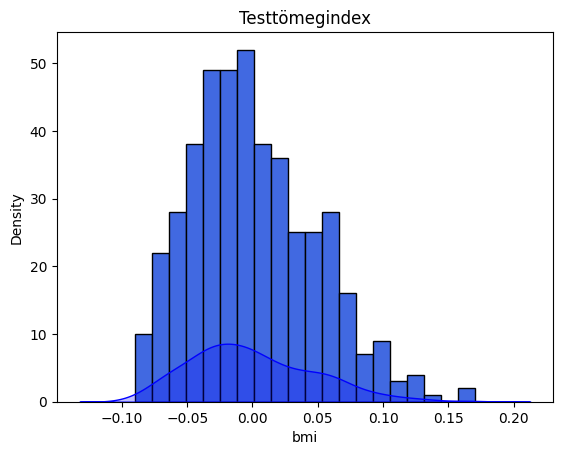

In [101]:
plt.hist(df["bmi"], bins=20, color="royalblue", edgecolor="black")
sns.kdeplot(df["bmi"], fill=True, color="blue")
plt.title("Testtömegindex")
plt.show()

### 4. Feladat – GroupBy és Aggregation

- Hozz létre egy új kategóriát a bmi oszlopra:
  - Alacsony (0-0.03)
  - Közepes (0.03-0.07)
  - Magas (>0.07)
- Csoportosítsd (groupby()) a mintákat a bmi kategória szerint, és számold ki az átlagos target értéket.

Elvárt eredmény:

- Egy táblázat, amely mutatja a bmi kategóriákhoz tartozó átlagos betegségértékeket.

In [102]:
df["bmi_kategoria"] = df["bmi"].apply(lambda x: "Alacsony" if x < 0.03 else ("Közepes" if 0.07 > x else "Magas"))
df_grouped = df.groupby("bmi_kategoria")["target"].mean()

display(df_grouped)

,target
bmi_kategoria,
Alacsony,131.776074
Közepes,189.556962
Magas,251.594595


### 5. Feladat – Korreláció
   
- Készíts egy korrelációs ábrát
  
Elvárt eredmény:

Egy hőtérkép (heatmap), amely kiemeli az eltéréseket.

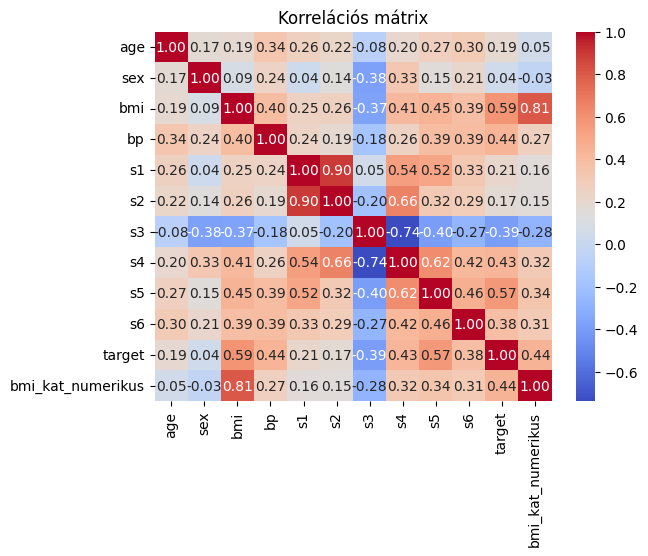

In [103]:
df["bmi_kat_numerikus"] = df["bmi_kategoria"].map(lambda x: 0 if x == "Alacsony" else (1 if x == "Kozepes" else 2))
numerikus_oszlopok = df.select_dtypes(include=["number"])
sns.heatmap(numerikus_oszlopok.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelációs mátrix")
plt.show()

### 6. Feladat – Pivot Table és Heatmap

- Készíts egy Pivot Table-t, amely az egyes bmi_category és bp (vérnyomás) értékek szerint mutatja az átlagos betegségértéket (target).
- A táblázatot jelenítsd meg heatmapként!
  
Elvárt eredmény:
Egy hőtérkép (heatmap), amely kiemeli az eltéréseket.

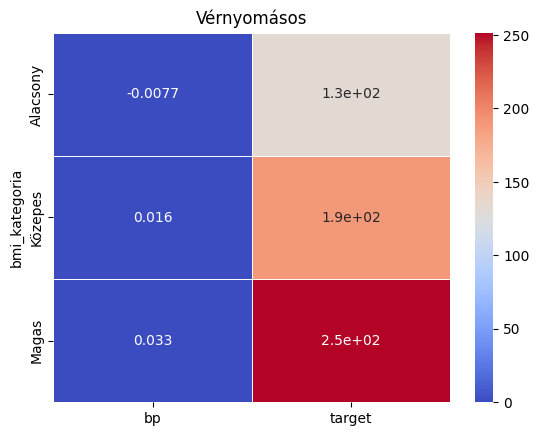

In [104]:

pivot_table = df.pivot_table(index="bmi_kategoria", values=["bp","target"], aggfunc="mean")



sns.heatmap(pivot_table, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Vérnyomásos")
plt.show()

### 7. Feladat – Violinplot és Swarmplot kombinálása

- Készíts violinplotot és swarmplotot a bmi_category szerinti target értékek eloszlására.

Elvárt eredmény: Egy vizualizáció, amely megmutatja az eloszlásokat és a valódi mintákat.

/tmp/ipython-input-1729175795.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="bmi_kategoria", y="target", data=df,  palette="coolwarm")


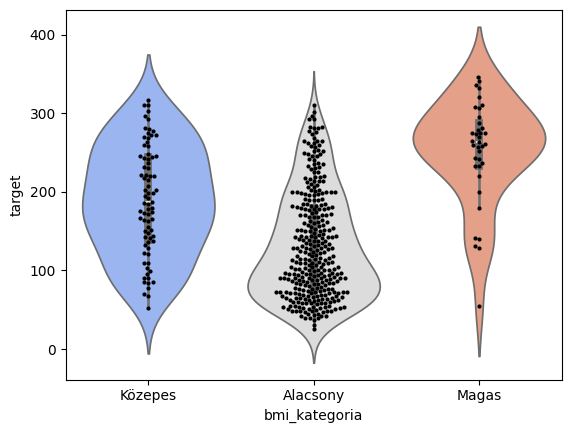

In [105]:
sns.violinplot(x="bmi_kategoria", y="target", data=df,  palette="coolwarm")
sns.swarmplot(x="bmi_kategoria", y="target", data=df,  color="black", size=3)

plt.show()

### 8. Feladat – Új kategóriaváltozó és oszlopdiagram

apply + lambda segítségével hozz létre egy új oszlopot age_level néven a age értékekből:
- „Fiatal” ha age < 0.04
- „Középkorú” ha 0.04 ≤ age < 0.07
- „Idősebb” ha age ≥ 0.07

Számold meg a kategóriák előfordulását, és ábrázold oszlopdiagramon

/tmp/ipython-input-1161991036.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="coolwarm")


<Axes: xlabel='age_level'>

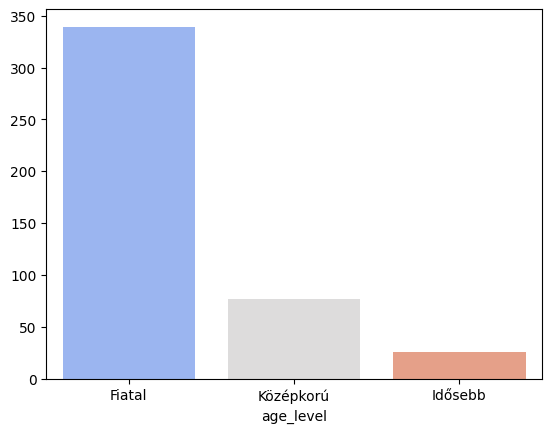

In [106]:
df["age_level"] = df["age"].apply(lambda x: "Fiatal" if x < 0.04 else ("Középkorú" if 0.07 > x else "Idősebb"))
counts = df["age_level"].value_counts()
sns.barplot(x=counts.index, y=counts.values, palette="coolwarm")

### 9. Feladat – GroupBy + Átlag vizualizálása

- groupby segítségével számold ki az átlagos target értéket bmi_category szerint.
- Az eredményt ábrázold oszlopdiagramon (bar plot).

Mit mutat az ábra?

/tmp/ipython-input-1751990023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_mean.index, y=target_mean.values, palette="coolwarm")


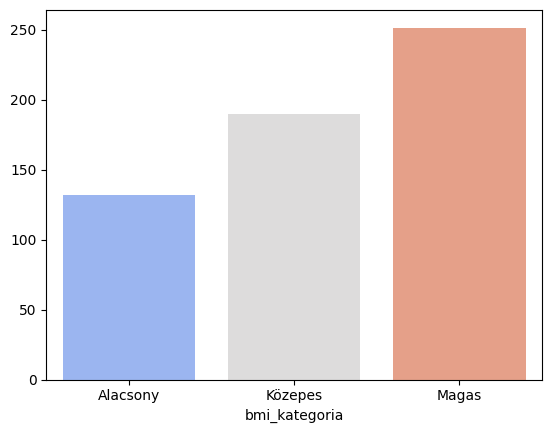

In [107]:
target_mean = df.groupby("bmi_kategoria")["target"].mean()
sns.barplot(x=target_mean.index, y=target_mean.values, palette="coolwarm")
plt.show()

### 10. Feladat – Több aggregáció és vizualizáció

- groupby("bp_level") + agg(["mean", "std"]) a target oszlopra.
- Az eredményből készíts hibasávos oszlopdiagramot (bar plot + errorbar).

Értelmezd: melyik vérnyomás-kategóriában a legnagyobb a szórás?

<Axes: xlabel='bp_level', ylabel='avg_target'>

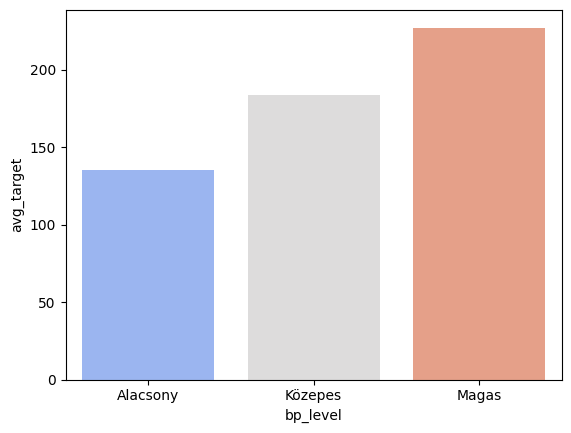

In [108]:
df["bp_level"] = df["bp"].apply(lambda x: "Alacsony" if x < 0.03 else ("Közepes" if 0.07 > x else "Magas"))

stats = df.groupby("bp_level").agg(
    avg_target=("target", "mean"),
    std_target=("target", "std"),
)

sns.barplot(x=stats.index, y=stats["avg_target"], hue=stats.index, palette="coolwarm")

### 11. Feladat – Crosstab és Heatmap

- Készíts pd.crosstab(df["bmi_category"], df["bp_level"]) táblázatot.
- Ábrázold heatmap segítségével, ahol a színek a mintaszámokat jelzik.

Mit mond el a táblázat a BMI és a vérnyomás kategóriákról?

<Axes: xlabel='bp_level', ylabel='bmi_kategoria'>

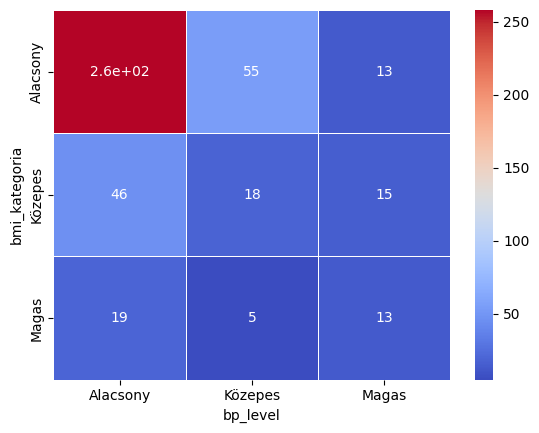

In [109]:
valami_counts = pd.crosstab(df["bmi_kategoria"], df["bp_level"])
sns.heatmap(valami_counts, annot=True, cmap="coolwarm", linewidths=0.5)

### 12. Feladat – Legmagasabb értékek vizualizálása

- groupby("bmi_category") + apply(lambda x: x.nlargest(5, "target"))
- Az így kiválasztott top 5-ös értékekből rajzolj scatter plotot: bmi az x tengelyen, target az y tengelyen.

Színezd a pontokat kategóriák szerint.

/tmp/ipython-input-3139460862.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_legmagasabb = df.groupby("bmi_kategoria").apply(lambda x: x.nlargest(5, "target"))


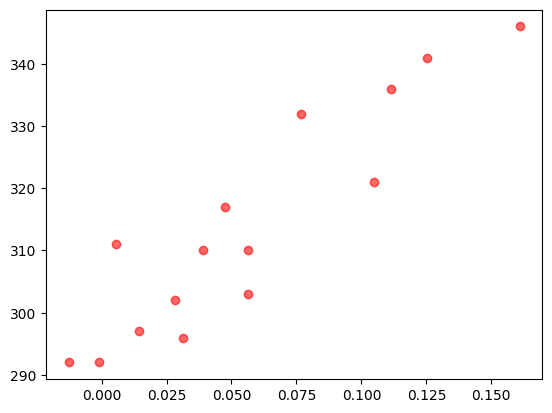

In [110]:
df_legmagasabb = df.groupby("bmi_kategoria").apply(lambda x: x.nlargest(5, "target"))


plt.scatter(df_legmagasabb["bmi"], df_legmagasabb["target"], color= "red", alpha=0.6)

plt.show()

### 13. Feladat – Korreláció rendezése és ábrázolása

- Számítsd ki az összes numerikus változó korrelációját a target-tel.
- Rendezd őket abszolút érték szerint csökkenő sorrendbe.

Ábrázold vízszintes oszlopdiagramon, hogy mely változók korrelálnak legerősebben.

<Axes: xlabel='None'>

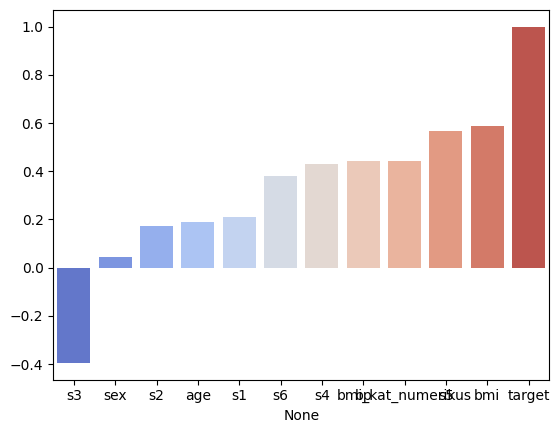

In [111]:
numerikus_oszlopok = df.select_dtypes(include=["number"])
df_cor = numerikus_oszlopok.corr()["target"]

df_sorted = df_cor.sort_values(ascending=True)

sns.barplot(x=df_sorted.index, y=df_sorted.values, hue=df_sorted.index, palette="coolwarm")


### 14. Feladat – Aggregált Pivot Table és Heatmap

- Készíts pivot táblát: sorok = bmi_category, oszlopok = bp_level, érték = átlagos target.
- Ábrázold seaborn.heatmap segítségével, annotációval.

Magyarázd el, mit mutat a két kategóriarendszer kombinációja.

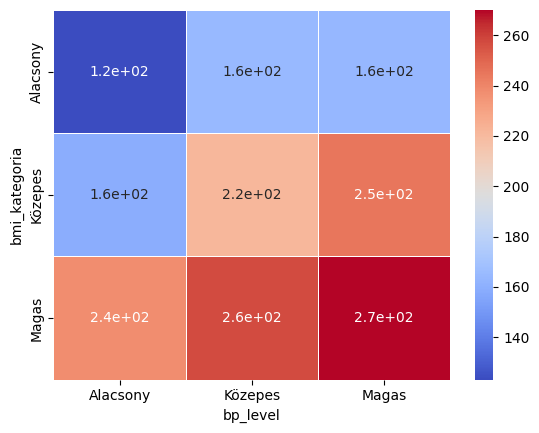

In [115]:
pivot_table = df.pivot_table(index="bmi_kategoria", columns="bp_level", values="target", aggfunc="mean")
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()